# CS6647 HW-1
## Steven Robbins
## 05/26/2023

In [4]:
# import needed libraries
from sympy import *

## Problem #1
## x^2 + 2x - 8 = 0

In [5]:
# define our variable with the sympy symbols function
x = symbols('x')

# define our problem with the sympy Eq equality function
eq = Eq(x**2 + 2*x - 8 , 0)

# solve using the sympy solve function
sol = solve(eq, x)

In [6]:
print(sol)

[-4, 2]


## Problem #2
## Find a function in which f(x) = f'(x)
###  (I think that's what this is asking, anyway.)

In [7]:
# define our variable with the sympy symbols function
x = symbols('x')

# and a function of x with the sympy Function
f = Function('f')(x)

In [8]:
# I think we can use sympy to define a
# differential eq using the sympy Derivative
# and subtract the original function of x
D = Derivative(f, x)

# with the derivative set up, we just need to subtract the f(x)
# and set it equal t0 zero using the sympy Eq
diff_eq = Eq(D - f, 0)

In [9]:
# to solve a differential equation sympy has a dsolve function
sol = dsolve(diff_eq, f)

### I wasn't sure how to interpret the answer that Python displays but it appears that after some reading into it:
### exp(x) = e^x, so that, the answer could be read as the function f(x) is a constant C1 multiplied by the exponential function e^x

In [10]:
print(sol)

Eq(f(x), C1*exp(x))


## Problem #3
## Get the definite integral of f(x) = x^3 from x = 0 to x = 1

In [11]:
# define our variable with the sympy symbols function
x = symbols('x')

# and the f(x) fuction
f = x**3

### There is a SymPy integrate function so we just need the absolute value of
### f(x) and the range. Then the integrate function just takes the two parameters

In [12]:
# abs of the function
abs = Abs(f)

# tuple for the range
rng = (x, 0, 1)

# compute the definite integral
integ = integrate(abs, rng)

### The area under the curve is 1/4

In [13]:
print(integ)

1/4


### Problem #4
### Σ\[x=0, oo\]\(1/x!\)
### or 'the sum of the series from zero to infinity, where each term is 1 over the factorial of x'

In [14]:
# set up our symbols
# x = symbols('x n') doesn't work for infinite series ?

x = symbols('x')
n = symbols('n', integer=True)
print(x,n)

x n


In [15]:
# create an expression for the terms
# exp = 1 / factorial(x)

exp = Sum(1/factorial(x), (x, 0, oo))

In [16]:
# this didnt work for infinite series, had to do some more reading
# sum = summation(exp, 0, )

# alt-236 doesn't work for infinity symbol - had to copy-paste
# sum = Sum(exp, (n, 0, oo))

# compute the PARTIAL sum
# part_sum = sum.doit().simplify()

result = exp.doit()
result = nsimplify(result)

In [17]:
print(result)
# print(sum)
# print(part_sum)

E


### Problem #5
### Calculate the limit: lim(n->oo)(1 + 1/n)^n

In [18]:
# set up symbols and our expression
n = symbols('n')
exp = (1 + 1/n)**n

In [19]:
# set up the limit calc using the limit sympy function
lim = limit(exp, n, oo)

In [20]:
print(lim)

E


### Problem #6
### Flip a matrix through its diagonal


In [21]:
# I'm taking this as transposing columns and rows
# define our matrix with sympy Matrix
M = Matrix([ [ 2,-3,-8, 7],
                  [-2,-1, 2,-7],
                  [ 1, 0,-3, 6] ])

# use the sympy transpose funciton from the Matrix class
flip = M.transpose()

In [22]:
# using repr function to make the matrix easier to read
print('Before:\n')
print(repr(M))
print('\n')
print('After:\n')
print(repr(flip))

Before:

Matrix([
[ 2, -3, -8,  7],
[-2, -1,  2, -7],
[ 1,  0, -3,  6]])


After:

Matrix([
[ 2, -2,  1],
[-3, -1,  0],
[-8,  2, -3],
[ 7, -7,  6]])


### Problem #7
### Do matrix row operations to R2 ← R2 + 3R1
### Update Row 2 to R2+3*R1

In [23]:
# create a 3x3 identity matrix with eye function
# identity matrix should have 1s in its pricipal
# row and 0s in the other elements
M = eye(3)
print(repr(M))

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])


In [24]:
# row 2 is equal to row 2 plus row 1 multiplied by 3
M[1, :] = M[1, :] + M[0, :] * 3

# print the matrix
print(repr(M))

Matrix([
[1, 0, 0],
[3, 1, 0],
[0, 0, 1]])


### Problem #8
### Find the eigenvalue and eigenvector of the matrix.

In [25]:
# set up our matrix
M = Matrix( [[ 9, -2],
             [-2, 6]] )

In [26]:
# sympy has functions for eigenvectors and eigenvalues
evals = M.eigenvals()
evecs = M.eigenvects()

In [27]:
# this returns key value pairs of an eigenvalue and a multiplicity
evals

{10: 1, 5: 1}

In [28]:
# returns a list of tuples that is the eigenvalue and eigenvector
evecs

[(5,
  1,
  [Matrix([
   [1/2],
   [  1]])]),
 (10,
  1,
  [Matrix([
   [-2],
   [ 1]])])]

In [29]:
# eigenvalues function returns an eigenvalue
# and a multiplicity
# Print the results
print("Returned from eigenvalues function")
print("********************************")
for eigenval in evals:
    print(f'Eigenvalues: {eigenval} : Multiplicity: {evals[eigenval]}')

print('')


# eigenvectors function returns a list of tuples that
# contains eigenvalues and eigenvectors
print("Returned from eigenvectors function")
print("*********************************")
for eigenvec in evecs:
    print("Eigenvalue:", repr(eigenvec[0]))
    print("Eigenvector:", repr(eigenvec[2][0]))
    print()


Returned from eigenvalues function
********************************
Eigenvalues: 10 : Multiplicity: 1
Eigenvalues: 5 : Multiplicity: 1

Returned from eigenvectors function
*********************************
Eigenvalue: 5
Eigenvector: Matrix([
[1/2],
[  1]])

Eigenvalue: 10
Eigenvector: Matrix([
[-2],
[ 1]])



### Problem #10
### Implement the Lotka-Voltarre pred/prey model
### Prey:
### dx/dt = αx - βxy = x(α - βy)
### Predator:
### dy/dt = δxy - γy = y(δx - γ)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import ipywidgets as ipw

In [31]:

# parameters given
alpha = 1.1 # growth rate of prey w/o predation
beta  = 0.4 # death rate of prey w/ predation
delta = 0.1 # growth rate of predators
gamma = 0.4 # death rate of predators w/o prey (starvation)

# carrying capacity wasn't specified but see
#  a lot of examples using it
# k1 = 100
# k2 = 100

# initial conditions (population in hundreds)
fish_pop = 10
bear_pop = 1
y0 = [fish_pop, bear_pop]

# time range
t = np.linspace(0, 50, num=1000)

In [32]:
# function defining the model
def pred_prey(y, t):
    fish = y[0]
    bear = y[1]
    d_fish_dt = alpha * fish - beta * fish * bear
    d_bear_dt = delta * fish * bear - gamma * bear
    return [d_fish_dt, d_bear_dt]

In [33]:
# the ODE system
populations = odeint(pred_prey, y0, t)
fish_pop_change = populations[:, 0]
bear_pop_change = populations[:, 1]

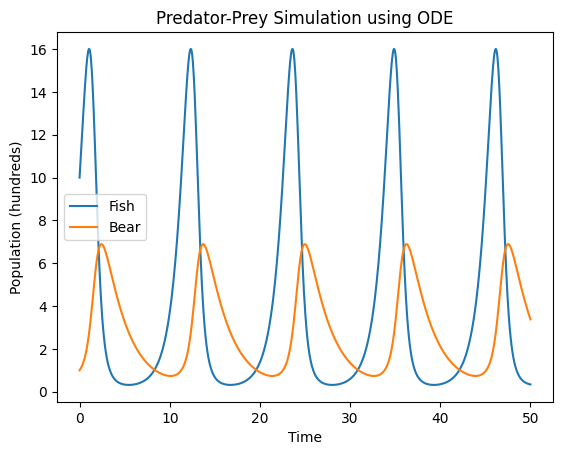

In [34]:
# viz
plt.plot(t, fish_pop_change, label='Fish')
plt.plot(t, bear_pop_change, label='Bear')
plt.xlabel('Time')
plt.ylabel('Population (hundreds)')
plt.title('Predator-Prey Simulation using ODE')
plt.legend()
plt.show()

## Testing things from the lecture videos

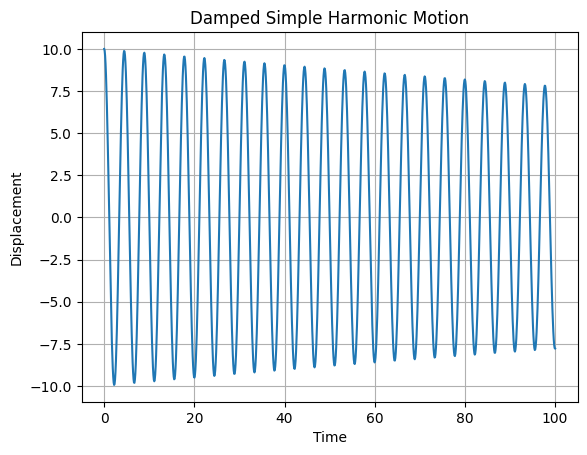

In [45]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t = sp.symbols('t')  # time
x = sp.Function('x')(t)  # displacement

# params
m = 1.0  # mass
k = 2.0  # spring constant
c = 0.005  # damping coefficient

# not sure why this isn't neg k/m * x
acceleration = (k/m) * x 

# equation of motion (differential equation)
eq = sp.diff(x, t, t) + (c/m) * sp.diff(x, t) + acceleration

# size of initial displacement of the mass
init_displacement = 10

# define the time range
t_values = np.linspace(0, 100, 1000)

# solve the differential equation with initial conditions
solution = sp.dsolve(eq, ics={x.subs(t, 0): init_displacement, x.diff(t).subs(t, 0): 0})

# evaluate the solution for the displacement at each time point
x_values = [solution.rhs.subs(t, t_val) for t_val in t_values]

# plot the displacement vs. time
plt.plot(t_values, x_values)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Damped Simple Harmonic Motion')
plt.grid(True)
plt.show()
